In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
mpl.style.use('seaborn-talk')


In [2]:
# base_dir = '.'
# base_dir = './May-5-Take2'
# base_dir = './May12SynradExport'
# base_dir = './May12SynradExport-Take2'


# base_dir = './Corrected-Beam-Parameter/tails only all magnets'
# base_dir = './Corrected-Beam-Parameter/Full beam and magnets'


# base_dir = 'Scraper at z 350 cm'


base_dir = 'May2020Lattice/CharlieGeometry'
# base_dir = 'May2020Lattice/UpdatedGeometryPumps'



In [3]:
df_flux = pd.read_excel(os.path.join(base_dir, 'Flux per facet.xlsx')  )

df_flux.set_index('Facet', inplace=True)

df_flux

,Hits,Flux (on facet),Power (on facet),Absorbed (on facet)
Facet,,,,
1,3158,395000000000,1.260000e-06,563
2,1585,226000000000,7.070000e-07,306
3,553,82700000000,2.570000e-07,122
4,27,4790000000,2.130000e-08,9
5,21,2900000000,7.650000e-09,4
...,...,...,...,...
18983,5646064,4100000000000000,1.450000e-01,0
18984,4478467,3140000000000000,1.100000e-01,0
18985,4473338,3130000000000000,1.090000e-01,0


In [4]:
# df_flux.loc[ 18985 , 'Flux (on facet)' ]

In [5]:
df_facets = pd.DataFrame()

In [6]:
filenames = glob.glob(os.path.join(base_dir, "./*.csv"))
print(len(filenames))
dfs = []

df_facets

cnt = 0;
for filename in filenames:
    cnt = cnt +1
    
    filename_base = os.path.basename(filename)
    try:
        facet_id = int(filename_base.split('.')[0]);
    except :
        print(f'Skip {filename_base}')
        continue;
        
    flux = df_flux.loc[ facet_id , 'Flux (on facet)' ]
    
    
    df = pd.read_csv(filename)
    scale = flux / df['Flux_[photon/s]'].sum();
    df['Flux_Normalized'] = df.apply(lambda x: x['Flux_[photon/s]'] * scale , axis =1)
    
    phi_average = np.arctan2(df['Pos_Y_[cm]'].mean(),df['Pos_X_[cm]'].mean())
    
    print(f'{cnt}: facet {facet_id} | <phi> = {phi_average} ->{filename} @ {flux:.2e} photon/s, scale = {scale}')
    
    df_facets = df_facets.append(
        {'Facet':facet_id, 
         'Flux': flux, 
#          'Power': df_flux.loc[ facet_id , 'Power (on facet)'],
         'Phi':phi_average}, ignore_index=True)
    
    dfs.append(df)
    

big_frame = pd.concat(dfs, ignore_index=True, sort=False)

13
1: facet 18952 | <phi> = 2.535631363771492 ->May2020Lattice/CharlieGeometry/./18952.csv @ 1.12e+15 photon/s, scale = 4.242986657325883e-05
2: facet 18966 | <phi> = 0.06672932450701394 ->May2020Lattice/CharlieGeometry/./18966.csv @ 1.93e+16 photon/s, scale = 0.0006966863436901529
3: facet 18967 | <phi> = -0.06663993679392326 ->May2020Lattice/CharlieGeometry/./18967.csv @ 1.93e+16 photon/s, scale = 0.0006944849834353145
4: facet 18968 | <phi> = -0.2414569714449307 ->May2020Lattice/CharlieGeometry/./18968.csv @ 3.25e+15 photon/s, scale = 0.00012353156909326534
5: facet 18981 | <phi> = -2.535851285683138 ->May2020Lattice/CharlieGeometry/./18981.csv @ 1.12e+15 photon/s, scale = 4.125163219364563e-05
6: facet 18982 | <phi> = -2.717584886610555 ->May2020Lattice/CharlieGeometry/./18982.csv @ 2.14e+15 photon/s, scale = 7.805998811227322e-05
7: facet 18983 | <phi> = -2.882694843979954 ->May2020Lattice/CharlieGeometry/./18983.csv @ 4.10e+15 photon/s, scale = 0.00014851354873514794
8: facet 189

In [7]:

df_facets.set_index('Facet', inplace=True)
df_facets.to_csv(os.path.join(base_dir, 'Facet_CheckAll.csv'))
df_facets

,Flux,Phi
Facet,,
18952.0,1.120000e+15,2.535631
18966.0,1.930000e+16,0.066729
18967.0,1.930000e+16,-0.066640
18968.0,3.250000e+15,-0.241457
18981.0,1.120000e+15,-2.535851
18982.0,2.140000e+15,-2.717585
18983.0,4.100000e+15,-2.882695
18984.0,3.140000e+15,-3.048013
18985.0,3.130000e+15,3.048016


In [8]:
Phi = big_frame.apply(lambda x : np.arctan2(x['Pos_Y_[cm]'], x['Pos_X_[cm]']), axis=1)

Text(0, 0.5, 'Sum[Virtual photon]/arc Virtual photon/bin')

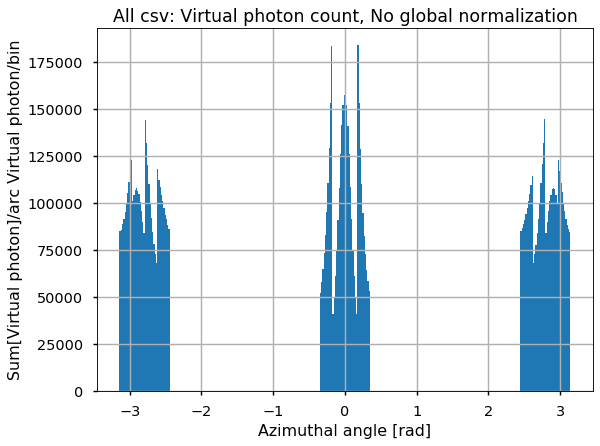

In [9]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
Phi.hist(bins=360)
plt.title('All csv: Virtual photon count, No global normalization')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Sum[Virtual photon]/arc Virtual photon/bin")

Text(0, 0.5, 'Sum[Flux]/arc photon/s/rad')

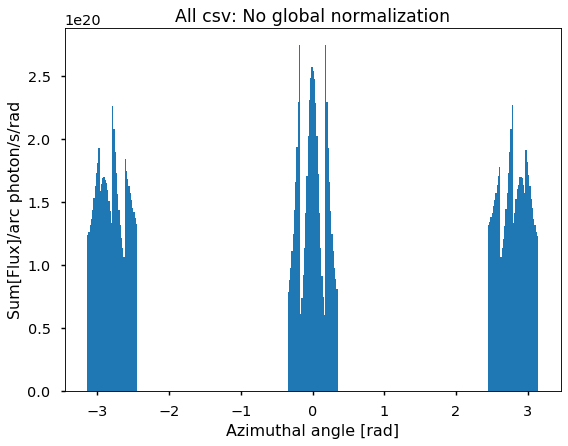

In [10]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame['Flux_[photon/s]'].to_numpy() / (2*np.pi/360) );
plt.title('All csv: No global normalization')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Sum[Flux]/arc photon/s/rad")

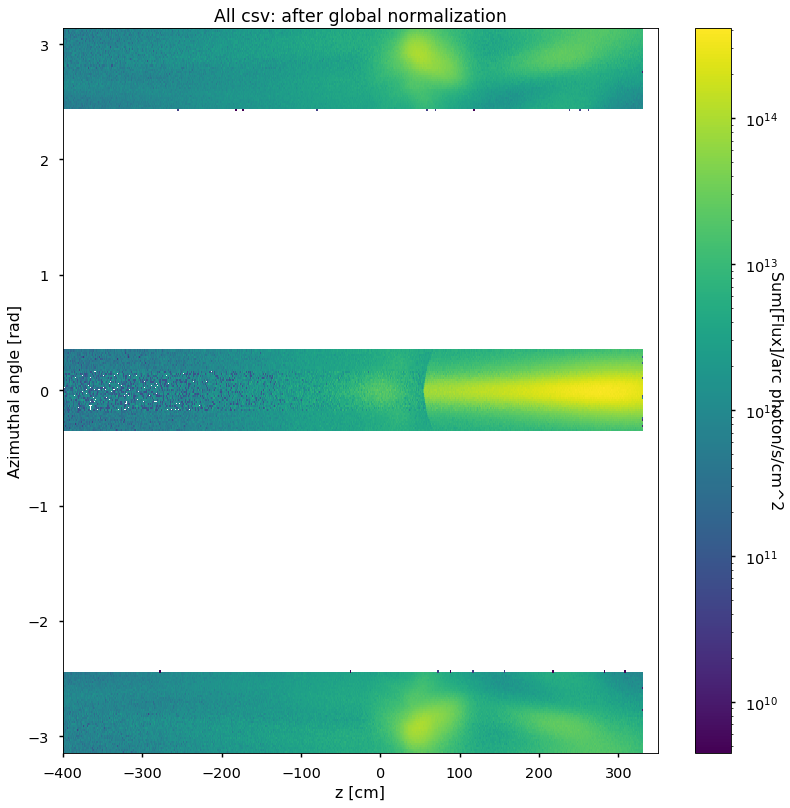

In [11]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
h = plt.hist2d(
    x = big_frame['Pos_Z_[cm]'],
    y = Phi.to_numpy(), 
    bins=[np.linspace(-400,350,num=750+1), np.linspace(-np.pi,np.pi,num=361) ] ,
    weights=big_frame['Flux_Normalized'].to_numpy() / (2*np.pi*2.9/360),
    norm=mpl.colors.LogNorm());
plt.title('All csv: after global normalization');
plt.xlabel("z [cm]");
plt.ylabel("Azimuthal angle [rad]");
cbar = plt.colorbar(h[3])
cbar.set_label('Sum[Flux]/arc photon/s/cm^2', rotation=270)


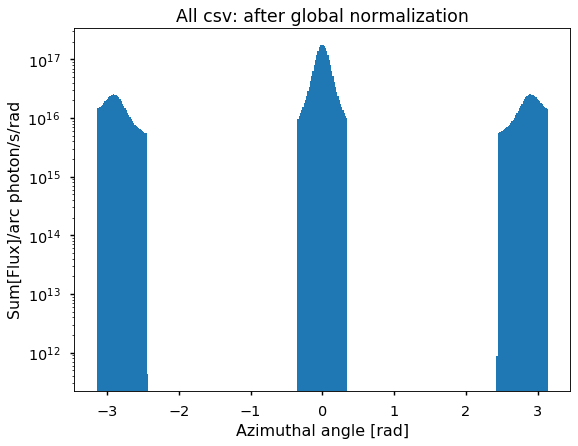

In [12]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame['Flux_Normalized'].to_numpy() / (2*np.pi/360),
    log = True );
plt.title('All csv: after global normalization');
plt.xlabel("Azimuthal angle [rad]");
plt.ylabel("Sum[Flux]/arc photon/s/rad");

Text(0, 0.5, 'Sum[Flux]/arc photon/s/rad')

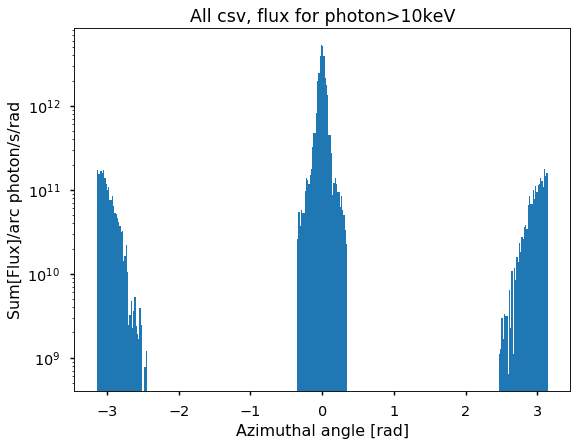

In [13]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3) * x['Flux_Normalized'], axis=1).to_numpy(),
    log = True);
plt.title('All csv, flux for photon>10keV')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Sum[Flux]/arc photon/s/rad")

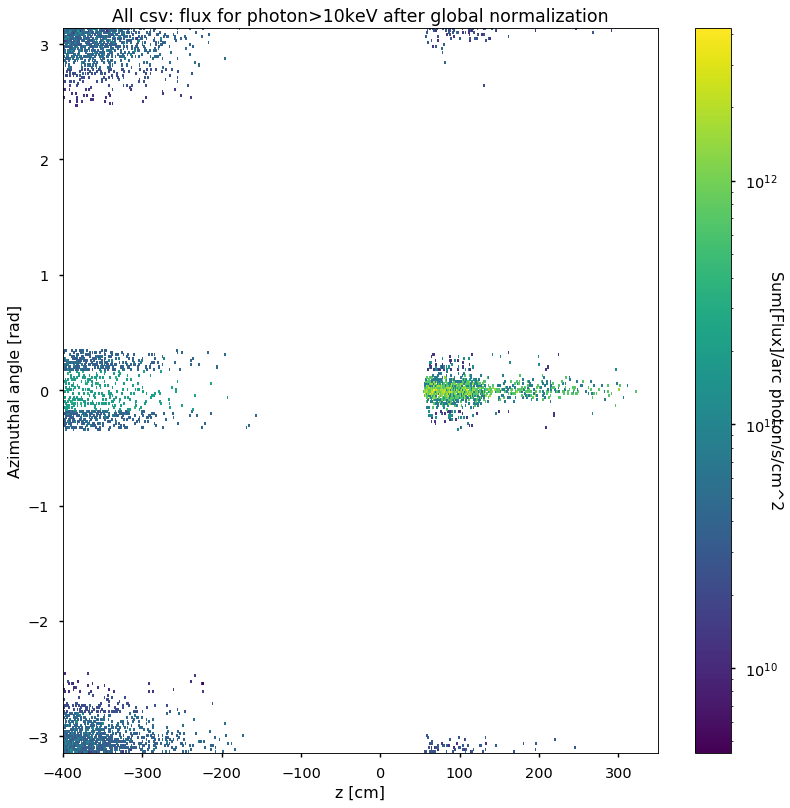

In [14]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
h = plt.hist2d(
    x = big_frame['Pos_Z_[cm]'],
    y = Phi.to_numpy(), 
    bins=[np.linspace(-400,350,num=750+1), np.linspace(-np.pi,np.pi,num=361) ] ,
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3) * x['Flux_Normalized'], axis=1).to_numpy() / (2*np.pi*2.9/360),
    norm=mpl.colors.LogNorm());
plt.title('All csv: flux for photon>10keV after global normalization');
plt.xlabel("z [cm]");
plt.ylabel("Azimuthal angle [rad]");
cbar = plt.colorbar(h[3])
cbar.set_label('Sum[Flux]/arc photon/s/cm^2', rotation=270)

Text(0, 0.5, 'Sum[Flux] photon/s/cm')

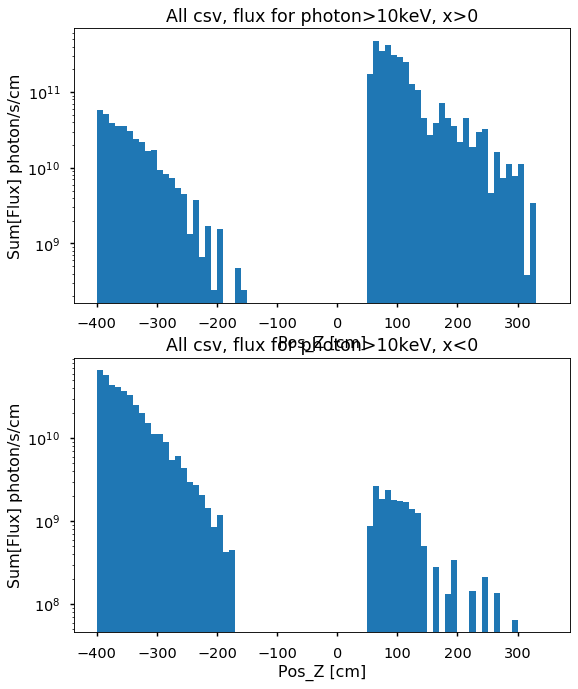

In [15]:
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']>0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True);
plt.title('All csv, flux for photon>10keV, x>0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] photon/s/cm")

plt.subplot(2, 1, 2)
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']<0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True);
plt.title('All csv, flux for photon>10keV, x<0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] photon/s/cm")

Text(0, 0.5, 'Sum[Flux] photon/s/cm')

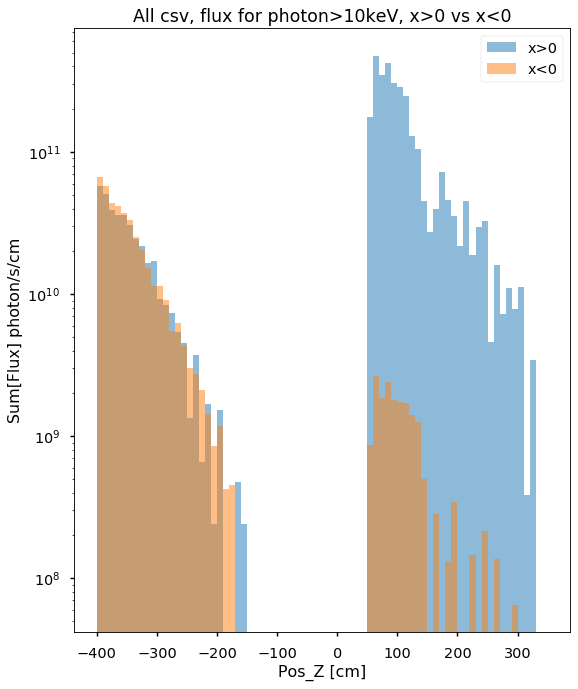

In [16]:
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']>0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True, label='x>0', alpha = 0.5, lw=3);
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']<0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True, label='x<0', alpha = 0.5, lw=3);
plt.legend()

plt.title('All csv, flux for photon>10keV, x>0 vs x<0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] photon/s/cm")

Text(0, 0.5, 'Sum[Flux] virtual photon/cm')

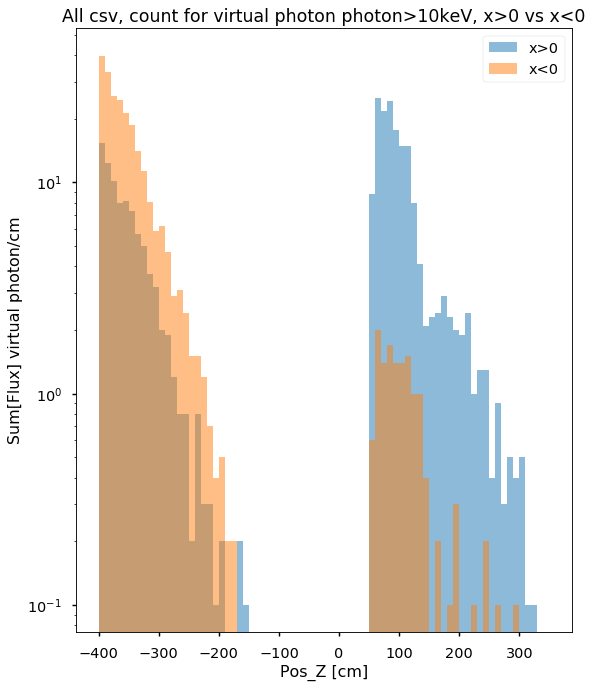

In [17]:
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']>0)  / 10, axis=1).to_numpy(),
    log = True, label='x>0', alpha = 0.5, lw=3);
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']<0)  / 10, axis=1).to_numpy(),
    log = True, label='x<0', alpha = 0.5, lw=3);
plt.legend()

plt.title('All csv, count for virtual photon photon>10keV, x>0 vs x<0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] virtual photon/cm")

Text(0, 0.5, 'Virtual photon count per bin')

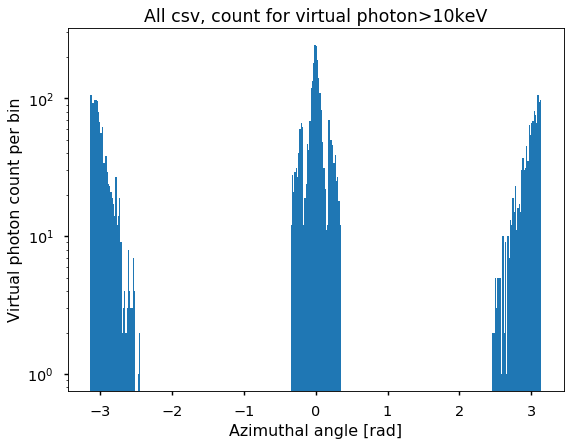

In [18]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3), axis=1).to_numpy(),
    log = True);
plt.title('All csv, count for virtual photon>10keV')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Virtual photon count per bin")

Text(0, 0.5, 'Virtual photon count per bin')

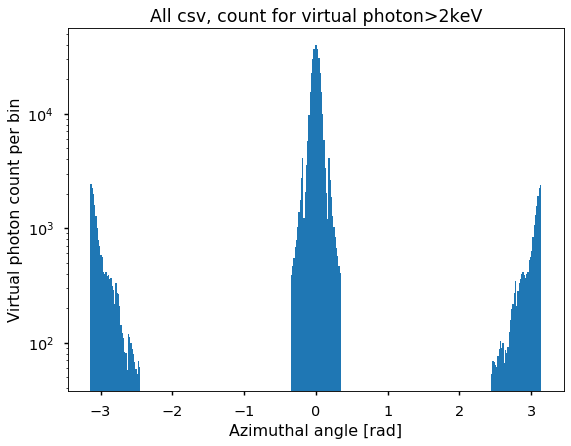

In [19]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>2e3), axis=1).to_numpy(),
    log = True);
plt.title('All csv, count for virtual photon>2keV')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Virtual photon count per bin")

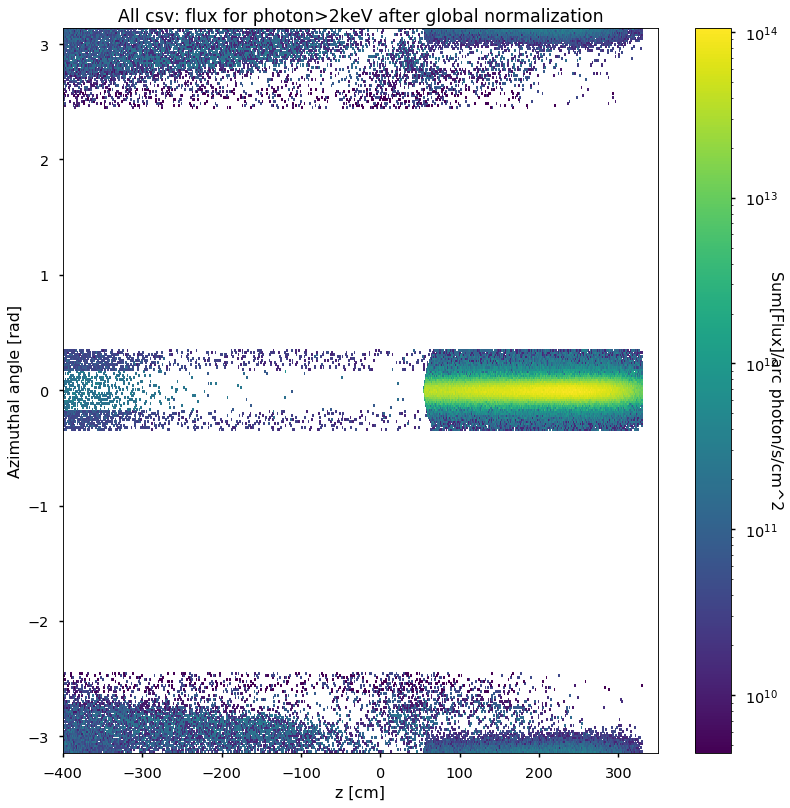

In [20]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
h = plt.hist2d(
    x = big_frame['Pos_Z_[cm]'],
    y = Phi.to_numpy(), 
    bins=[np.linspace(-400,350,num=750+1), np.linspace(-np.pi,np.pi,num=361) ] ,
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>2e3) * x['Flux_Normalized'], axis=1).to_numpy() / (2*np.pi*2.9/360),
    norm=mpl.colors.LogNorm());
plt.title('All csv: flux for photon>2keV after global normalization');
plt.xlabel("z [cm]");
plt.ylabel("Azimuthal angle [rad]");
cbar = plt.colorbar(h[3])
cbar.set_label('Sum[Flux]/arc photon/s/cm^2', rotation=270)


In [21]:
big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3), axis=1).sum()

4936

In [22]:
big_frame.apply(lambda x: int(x['Energy_[eV]']>2e3), axis=1).sum()

400552

In [23]:
# os.system('jupyter nbconvert --to html CheckAll.ipynb')
# os.system(f'mv CheckAll.html {base_dir}/')

In [3]:
# from time import sleep
# from IPython.display import display, Javascript
# import hashlib

# def save_notebook(file_path):
#     start_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
#     display(Javascript('IPython.notebook.save_checkpoint();'))
#     current_md5 = start_md5

#     while start_md5 == current_md5:
#         sleep(1)
#         current_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
        
#     print(f'saved to {file_path} {start_md5} -> {current_md5}');


# save_notebook('CheckAll.ipynb')
os.system('jupyter nbconvert --to html CheckAll.ipynb')
print(os.popen(f'mv -fv CheckAll.html \'{base_dir}/\'').read())


‘CheckAll.html’ -> ‘May2020Lattice/CharlieGeometry/CheckAll.html’

